>### 🚩 *Create a free WhyLabs account to get more value out of whylogs!*<br> 
>*Did you know you can store, visualize, and monitor whylogs profiles with the [WhyLabs Observability Platform](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Image_Logging)? Sign up for a [free WhyLabs account](https://whylabs.ai/whylogs-free-signup?utm_source=whylogs-Github&utm_medium=whylogs-example&utm_campaign=Image_Logging_UDF_Metric) to leverage the power of whylogs and WhyLabs together!*

### Image UDF with custom resolver example

In [15]:
%pip install whylogs[all]==1.2.9.dev0 datasets -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datasets import load_dataset
# note this is an arbitrary dataset chosen to illustrate logging images
# with a UDF, but you can use your own data or other image dataset.
dataset = load_dataset("hamdan07/UltraSound-Lung")


/home/jamie/projects/v1/whylogs/python/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Resolving data files: 100%|██████████| 300/300 [00:00<00:00, 1358.44it/s]


In [5]:
# Hugging Face dataset, lets see what the keys and structure
# look like
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 300
    })
})

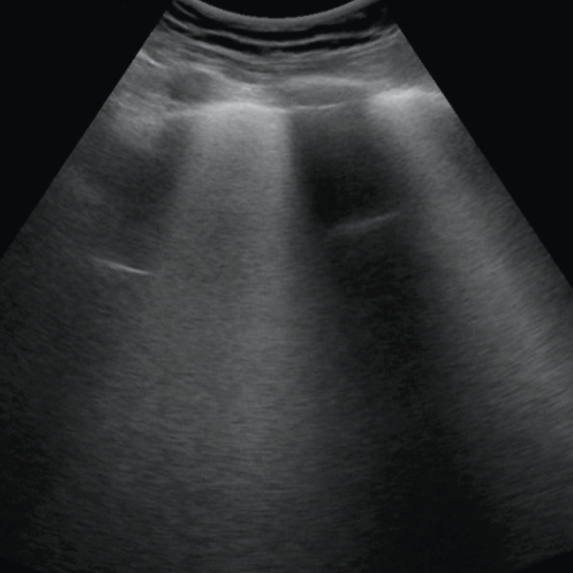

In [6]:
from matplotlib.pyplot import imshow
from PIL.Image import Image as ImageType

# lets create a list to hold the first three training images,
# we will log each of these image with whylogs and store per image metadata as debug events
images = [dataset["train"]['image'][0], dataset["train"]['image'][1], dataset["train"]['image'][2]]

# lets create a variable to for the first image and call it test_image and render it to see what the image looks
test_image: ImageType = images[0]
test_image


In [7]:
# In a production scenario you might have additional context information associated with this image as part of a record
# you would like to profile with whylogs. For this example, we will use a few pieces of metadata that is already in the image:
print(test_image.filename)
print(test_image.format_description)
print(test_image.getextrema())


/home/jamie/.cache/huggingface/datasets/downloads/1cee894d0ca5b7419946e0507f813e45135733dd383a397ccbca9dac268056ec
Portable network graphics
((6, 198), (8, 199), (7, 200), (255, 255))


In [16]:
import uuid
import whylogs as why

# Here we show that you can pass in your own string for a unique identifier as a trace_id
unique_identifier = str(uuid.uuid4())
print(unique_identifier)

# This is a relatively free form dictionary of debug metadata you can pass in along with this
# single image profiling. These data will then be queryable in the platform later, but sharing the
# API early to validate the approach. The values need to be JSON serializable.
test_image_metadata = {
    "filename" : test_image.filename,
    "format_description": test_image.format_description,
    "image extrema": test_image.getextrema(),
}
results = why.log_single_image(test_image, debug_event=test_image_metadata, trace_id=unique_identifier)

632e4284-2aac-42f5-87e3-f6b37669ae5f


In [ ]:
!ls

In [10]:
# lets view the profile's udf metric we added locally before uploading to whylabs
results.view().get_column("image").to_summary_dict()


{'image/ExifIFD:counts/n': 1,
 'image/ExifIFD:counts/null': 0,
 'image/ExifIFD:counts/nan': 0,
 'image/ExifIFD:counts/inf': 0,
 'image/ExifIFD:types/integral': 1,
 'image/ExifIFD:types/fractional': 0,
 'image/ExifIFD:types/boolean': 0,
 'image/ExifIFD:types/string': 0,
 'image/ExifIFD:types/object': 0,
 'image/ExifIFD:types/tensor': 0,
 'image/ExifIFD:cardinality/est': 1.0,
 'image/ExifIFD:cardinality/upper_1': 1.000049929250618,
 'image/ExifIFD:cardinality/lower_1': 1.0,
 'image/ExifIFD:distribution/mean': 26.0,
 'image/ExifIFD:distribution/stddev': 0.0,
 'image/ExifIFD:distribution/n': 1,
 'image/ExifIFD:distribution/max': 26.0,
 'image/ExifIFD:distribution/min': 26.0,
 'image/ExifIFD:distribution/q_01': 26.0,
 'image/ExifIFD:distribution/q_05': 26.0,
 'image/ExifIFD:distribution/q_10': 26.0,
 'image/ExifIFD:distribution/q_25': 26.0,
 'image/ExifIFD:distribution/median': 26.0,
 'image/ExifIFD:distribution/q_75': 26.0,
 'image/ExifIFD:distribution/q_90': 26.0,
 'image/ExifIFD:distribu

In [11]:
import os
import getpass

# set your org-id here - should be something like "org-xxxx"
print("Enter your WhyLabs Org ID") 
os.environ["WHYLABS_DEFAULT_ORG_ID"] = input()

# set your datased_id (or model_id) here - should be something like "model-xxxx"
print("Enter your WhyLabs Dataset ID")
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = input()
print("Enter your WhyLabs API KEY")
os.environ["WHYLABS_API_KEY"] = getpass.getpass()
print("Using API Key ID: ", os.environ["WHYLABS_API_KEY"][0:10])

Enter your WhyLabs Org ID
Enter your WhyLabs Dataset ID
Enter your WhyLabs API KEY
Using API Key ID:  


In [14]:
# lets upload this to whylabs
results.writer("whylabs").option(reference_profile_name="").write()

[(True, 'ref-8znRc45YGJ1pp5vr')]